#  Binarize targets in regression task.ipynb

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Gan4x4/cv/blob/main/Binarize_targets_in_regression_task.ipynb)

In [ ]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

print(housing.data.shape, housing.target.shape)
#sklearn.datasets.fetch_california_housing

(20640, 8) (20640,)


Define toy NN

In [ ]:
import torch
from torch import nn


class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1)
        )

    def forward(self, x):
        return self.layers(x)

model = MLP()

Smoke test

In [ ]:
dummy = torch.randn(8)
out = model(dummy)
print(dummy)

tensor([-0.0632,  0.1690, -0.3171, -0.0289,  1.1379, -1.6120,  0.7286,  0.4071])


Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.3, random_state=42)

Standartize data (not targets)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

X_tensor = torch.FloatTensor(x_train_scaled)
y_tensor = torch.FloatTensor(y_train)

# Create TensorDataset
train_dataset = TensorDataset(X_tensor, y_tensor)

# Create DataLoader
train_dataloader = DataLoader(train_dataset , batch_size=256, shuffle=True)

# Iterate through dataloader
for batch_X, batch_y in train_dataloader :
    print(f"Batch size: {batch_X.shape}")
    print(f"Target shape: {batch_y.shape}")
    break

Batch size: torch.Size([256, 8])
Target shape: torch.Size([256])


Train

In [ ]:
import torch.optim as optim
from tqdm import tqdm
from torch.utils.data import TensorDataset, DataLoader


def train(x,y):
  torch.manual_seed(42)
  X_tensor = torch.FloatTensor(x)
  y_tensor = torch.FloatTensor(y)

  train_dataset = TensorDataset(X_tensor, y_tensor)
  train_dataloader = DataLoader(train_dataset , batch_size=256, shuffle=True)

  model = MLP()
  model.train()
  criterion = nn.MSELoss()
  optimizer = optim.AdamW(model.parameters(), lr=0.0005)


  # Training loop
  for epoch in tqdm(range(20)):
    for data, target in train_dataloader:
        optimizer.zero_grad()
        outputs = model(data)  # Sample input
        loss = criterion(outputs.squeeze(), target)  # Sample target
        loss.backward()
        optimizer.step()
    tqdm.write(f" loss  = {loss.item():.4f}")
  return model



In [ ]:
model = train(x_train_scaled,y_train)

 10%|█         | 2/20 [00:00<00:03,  5.97it/s]

 loss  = 4.5342
 loss  = 3.4748


 20%|██        | 4/20 [00:00<00:02,  5.94it/s]

 loss  = 3.6798
 loss  = 2.8349


 30%|███       | 6/20 [00:01<00:02,  5.71it/s]

 loss  = 1.7656
 loss  = 1.2534


 40%|████      | 8/20 [00:01<00:02,  5.78it/s]

 loss  = 0.7723
 loss  = 1.0859


 50%|█████     | 10/20 [00:01<00:01,  5.73it/s]

 loss  = 0.4815
 loss  = 0.7235


 60%|██████    | 12/20 [00:02<00:01,  5.69it/s]

 loss  = 1.1169
 loss  = 0.5788


 70%|███████   | 14/20 [00:02<00:01,  5.78it/s]

 loss  = 0.6044
 loss  = 0.5555


 80%|████████  | 16/20 [00:02<00:00,  5.69it/s]

 loss  = 0.6779
 loss  = 0.3620


 90%|█████████ | 18/20 [00:03<00:00,  5.72it/s]

 loss  = 0.5042
 loss  = 0.6454


100%|██████████| 20/20 [00:03<00:00,  5.74it/s]

 loss  = 0.5109
 loss  = 0.3030


In [ ]:
from sklearn.metrics import r2_score

model.eval()
out = model(torch.FloatTensor(x_test_scaled))
r2_score(out.detach(), y_test)

0.3608334259212541

Standartize target

In [ ]:
from sklearn.preprocessing import StandardScaler


y_scaler = StandardScaler()
y_scaler.fit(y_train.reshape(-1,1))
y_train_scaled = y_scaler.transform(y_train.reshape(-1,1)).flatten()

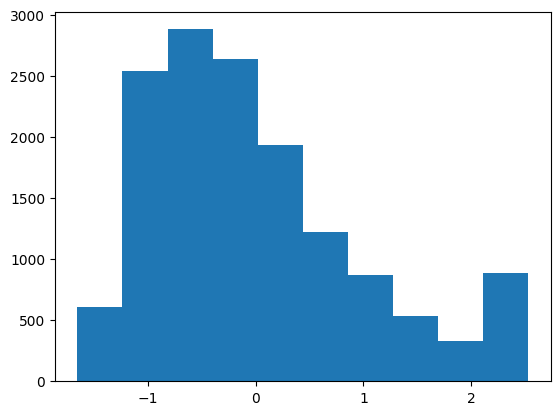

In [ ]:
import matplotlib.pyplot as plt

#plt.hist(y_test)
plt.hist(y_train_scaled)
plt.show()

In [ ]:
model = train(x_train_scaled,y_train_scaled)

 10%|█         | 2/20 [00:00<00:02,  6.04it/s]

 loss  = 1.1045
 loss  = 0.8462


 20%|██        | 4/20 [00:00<00:02,  5.82it/s]

 loss  = 0.7703
 loss  = 0.6830


 30%|███       | 6/20 [00:01<00:02,  5.83it/s]

 loss  = 0.4694
 loss  = 0.5153


 40%|████      | 8/20 [00:01<00:02,  5.69it/s]

 loss  = 0.2999
 loss  = 0.4983


 50%|█████     | 10/20 [00:01<00:01,  5.73it/s]

 loss  = 0.2230
 loss  = 0.3735


 60%|██████    | 12/20 [00:02<00:01,  5.84it/s]

 loss  = 0.5474
 loss  = 0.2913


 70%|███████   | 14/20 [00:02<00:01,  5.73it/s]

 loss  = 0.2989
 loss  = 0.3030


 80%|████████  | 16/20 [00:02<00:00,  5.65it/s]

 loss  = 0.3548
 loss  = 0.2197


 90%|█████████ | 18/20 [00:03<00:00,  5.76it/s]

 loss  = 0.2742
 loss  = 0.3497


100%|██████████| 20/20 [00:03<00:00,  5.75it/s]

 loss  = 0.3424
 loss  = 0.2119


In [ ]:
model.eval()
out = model(torch.FloatTensor(x_test_scaled)).detach()
y_test_scaled = y_scaler.transform(y_test.reshape(-1,1))
print("R2 on standartized target: ",r2_score(out, y_test_scaled))
out =  y_scaler.inverse_transform(out.detach()).flatten()
print("R2 after inverse transform on target: ",r2_score(out, y_test))

R2 on standartized target:  0.5400625695342768
R2 after inverse transform on target:  0.5400625695342767


Results are the same

Now apply quantile transform

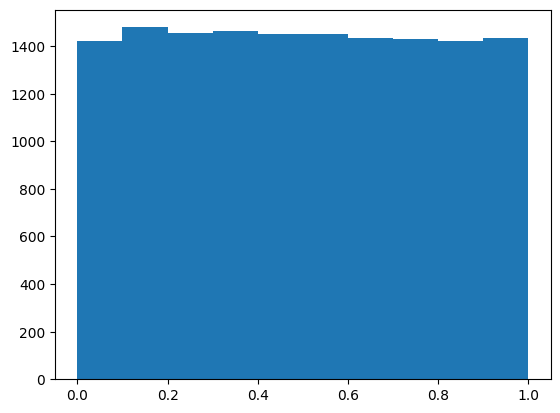

In [ ]:
from sklearn.preprocessing import QuantileTransformer


qt = QuantileTransformer(output_distribution='uniform')
qt.fit(y_train.reshape(-1,1))
y_train_qt = qt.transform(y_train.reshape(-1,1)).flatten()
plt.hist(y_train_qt)
plt.show()

In [ ]:
model = train(x_train_scaled,y_train_qt)

 10%|█         | 2/20 [00:00<00:03,  5.92it/s]

 loss  = 0.1243
 loss  = 0.0866


 20%|██        | 4/20 [00:00<00:02,  6.06it/s]

 loss  = 0.0664
 loss  = 0.0513


 30%|███       | 6/20 [00:00<00:02,  6.04it/s]

 loss  = 0.0462
 loss  = 0.0414


 35%|███▌      | 7/20 [00:01<00:02,  5.55it/s]

 loss  = 0.0384


 40%|████      | 8/20 [00:01<00:02,  4.89it/s]

 loss  = 0.0410


 45%|████▌     | 9/20 [00:01<00:02,  4.61it/s]

 loss  = 0.0218


 50%|█████     | 10/20 [00:01<00:02,  4.47it/s]

 loss  = 0.0277


 55%|█████▌    | 11/20 [00:02<00:02,  4.27it/s]

 loss  = 0.0357


 60%|██████    | 12/20 [00:02<00:01,  4.30it/s]

 loss  = 0.0234


 65%|██████▌   | 13/20 [00:02<00:01,  4.21it/s]

 loss  = 0.0268


 70%|███████   | 14/20 [00:02<00:01,  4.13it/s]

 loss  = 0.0206


 75%|███████▌  | 15/20 [00:03<00:01,  4.01it/s]

 loss  = 0.0256


 80%|████████  | 16/20 [00:03<00:01,  3.88it/s]

 loss  = 0.0190


 85%|████████▌ | 17/20 [00:03<00:00,  3.91it/s]

 loss  = 0.0320


 95%|█████████▌| 19/20 [00:04<00:00,  4.29it/s]

 loss  = 0.0279
 loss  = 0.0308


100%|██████████| 20/20 [00:04<00:00,  4.59it/s]

 loss  = 0.0170


In [ ]:
model.eval()
out = model(torch.FloatTensor(x_test_scaled)).detach()
y_test_qt = qt.transform(y_test.reshape(-1,1)).flatten()
print("R2 on QuantileTransformed target ", r2_score(out, y_test_qt))
out = qt.inverse_transform(out).flatten()
print("R2 on inverse transformed target ", r2_score(out, y_test))

R2 on QuantileTransformed target  0.5711363247766841
R2 on inverse transformed target  0.3786684251527155


Why isn't R2 the same?

Because quantile transformation is not linear instead of standardization

Get actal values

In [ ]:
prediction_10 = model(torch.FloatTensor(x_test_scaled))
abs_values = qt.inverse_transform(prediction_10.detach().numpy()).flatten()

print(list(zip(abs_values, y_test[:10])))

[(0.5911098, 0.477), (1.625, 0.458), (3.3288515, 5.00001), (2.4866016, 2.186), (2.4486377, 2.78), (1.718085, 1.587), (2.4297009, 1.982), (1.8420631, 1.575), (2.781098, 3.4), (4.7930126, 4.466)]
